In [1]:
import pandas as pd

In [2]:
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


In [3]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
 2   name    49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


> fruits는 35개의 사과와 14개의 딸기 데이터로 구성되어 있다.

In [4]:
# 사과 정보 불러오기

apple = fruits[fruits.name == 'apple']
apple.tail()

,length,weight,name
30,38.5,920.0,apple
31,38.5,955.0,apple
32,39.5,925.0,apple
33,41.0,975.0,apple
34,41.0,950.0,apple


In [5]:
import matplotlib.pyplot as plt

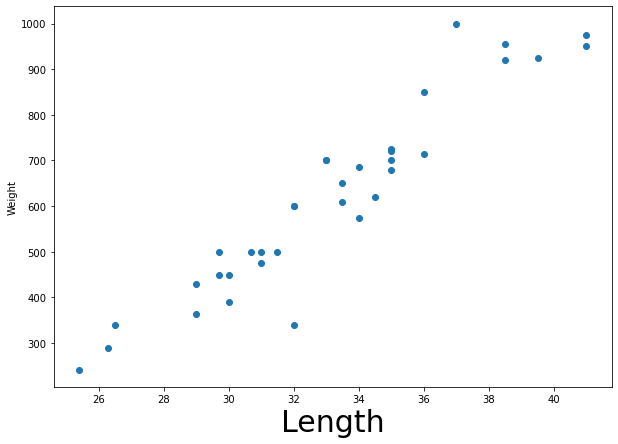

In [6]:
# apple에 대한 산포도 그리기
plt.figure(figsize=(10,7))
plt.scatter(
    data = apple,
    x = 'length',
    y = 'weight'
)
plt.xlabel('Length',fontsize = 30)
plt.ylabel('Weight')
plt.show()

In [7]:
berry = fruits[fruits.name == 'berry'].reset_index(drop=True)
berry.head()

,length,weight,name
0,9.8,6.7,berry
1,10.5,7.5,berry
2,10.6,7.0,berry
3,11.0,9.7,berry
4,11.2,9.8,berry


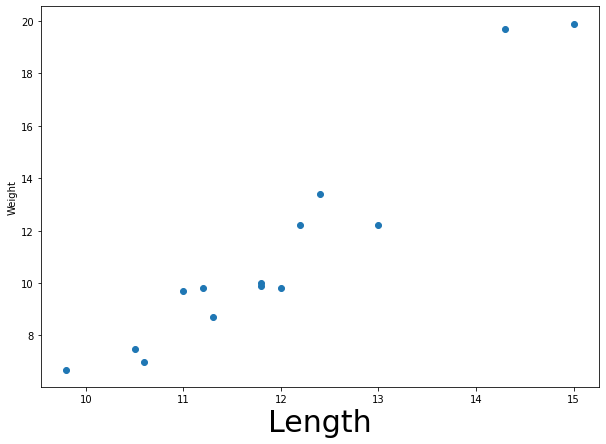

In [8]:
# 딸기에 대한 산포도 그리기

plt.figure(figsize=(10,7))
plt.scatter(
    data = berry,
    x = 'length',
    y = 'weight'
)
plt.xlabel('Length',fontsize = 30)
plt.ylabel('Weight')
plt.show()

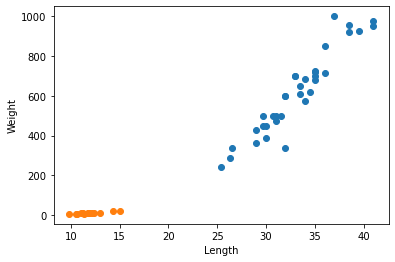

In [9]:
# 2개의 DataSet 을 산포도로 한꺼번에 비교하기
plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

# 머신러닝을 위한 데이터 준비

### Feature Data와 Target Data의 분리

In [10]:
# Featrue Data

fruitsData = fruits.iloc[:,:2]
fruitsData.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [11]:
# Target Data
fruitsTarget = fruits.name
fruitsTarget.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

---
# 최근접이웃(KNN : K Nearest Neighbors) 분류 알고리즘 사용
: 최근접 이웃 분류 알고리즘은 지도학습이다.

![](../Data/knn-01.png)
<img src="../Data/knn-01.png"/>

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [13]:
kn = KNeighborsClassifier() # default값이 n_neighbors = 5 / 보통은 홀수로 입력 <-- Hyper Parameter

In [14]:
# 학습 시키기
kn.fit(fruitsData, fruitsTarget)

KNeighborsClassifier()

In [17]:
print('정확도 :',kn.score(fruitsData,fruitsTarget))
print(metrics.classification_report(kn.predict(fruitsData),fruitsTarget))

정확도 : 1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        35
       berry       1.00      1.00      1.00        14

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



> 문제와 답을 다알려주고 정확성을 확인하였더니 바로 100점이 나왔다. 근데 좀 ...

### 예측해 보기
길이가 30cm이고 무게가 600g인 과일은 무엇일까요?

In [19]:
kn.predict([[30,600]])

array(['apple'], dtype=object)

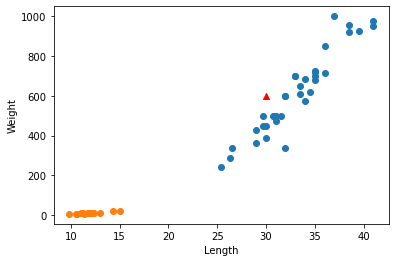

In [24]:
# 산포도로 예측 범위 확인하기

plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)
plt.scatter(30,600,marker = '^',c= 'red')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()